<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(_3_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.2_n250.csv',
 'data_add_delta_-3.2_n120.csv',
 'data_add_delta_-3.2_n60.csv',
 'data_add_delta_-3.2_n30.csv',
 'data_add_delta_-3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.383553,74.726794,41.947907,0.000995,198.059249,198.058154,0.001095
1,0.0,1.0,21.579846,71.504521,94.147984,0.001467,197.233819,197.232386,0.001432
2,0.0,2.0,93.746936,71.228102,65.244713,-0.000437,240.219314,240.219532,-0.000218
3,0.0,3.0,54.772415,28.768500,37.397885,-0.008981,130.929819,130.939401,-0.009582
4,0.0,4.0,57.985735,84.346198,66.448213,0.000378,218.780524,218.779915,0.000609
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,52.065851,97.822000,54.142832,-0.000320,214.030362,214.030275,0.000087
249996,999.0,246.0,54.673940,35.513590,33.848179,0.001360,134.037068,134.036770,0.000298
249997,999.0,247.0,57.306068,31.720182,62.348468,0.004596,161.379315,161.375682,0.003633
249998,999.0,248.0,93.649454,45.275101,91.094798,0.002544,240.021897,240.019797,0.002100


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.383553,74.726794,41.947907,0.000995,198.059249,198.058154,0.001095
1,0.0,1.0,21.579846,71.504521,94.147984,0.001467,197.233819,197.232386,0.001432
2,0.0,2.0,93.746936,71.228102,65.244713,-0.000437,240.219314,240.219532,-0.000218
3,0.0,3.0,54.772415,28.768500,37.397885,-0.008981,130.929819,130.939401,-0.009582
4,0.0,4.0,57.985735,84.346198,66.448213,0.000378,218.780524,218.779915,0.000609
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,52.065851,97.822000,54.142832,-0.000320,214.030362,214.030275,0.000087
249996,999.0,246.0,54.673940,35.513590,33.848179,0.001360,134.037068,134.036770,0.000298
249997,999.0,247.0,57.306068,31.720182,62.348468,0.004596,161.379315,161.375682,0.003633
249998,999.0,248.0,93.649454,45.275101,91.094798,0.002544,240.021897,240.019797,0.002100


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    71.383553  74.726794  41.947907  0.000995  198.059249   
      1.0    21.579846  71.504521  94.147984  0.001467  197.233819   
      2.0    93.746936  71.228102  65.244713 -0.000437  240.219314   
      3.0    54.772415  28.768500  37.397885 -0.008981  130.929819   
      4.0    57.985735  84.346198  66.448213  0.000378  218.780524   
...                ...        ...        ...       ...         ...   
999.0 245.0  52.065851  97.822000  54.142832 -0.000320  214.030362   
      246.0  54.673940  35.513590  33.848179  0.001360  134.037068   
      247.0  57.306068  31.720182  62.348468  0.004596  161.379315   
      248.0  93.649454  45.275101  91.094798  0.002544  240.021897   
      249.0  24.969187  96.114145  42.907750 -0.000990  173.990091   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    198.058154  0.001095  
      1.0    197.232386  0.001432  
      2.0    240.219532 -0.000218  
      3.0    130.939401 -0.009582  
      4.0    218.779915  0.000609  
...                 ...       ...  
999.0 245.0  214.030275  0.000087  
      246.0  134.036770  0.000298  
      247.0  161.375682  0.003633  
      248.0  240.019797  0.002100  
      249.0  173.990817 -0.000726  

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    71.383553  74.726794  41.947907  0.000995  198.059249   
      1.0    21.579846  71.504521  94.147984  0.001467  197.233819   
      2.0    93.746936  71.228102  65.244713 -0.000437  240.219314   
      3.0    54.772415  28.768500  37.397885 -0.008981  130.929819   
      4.0    57.985735  84.346198  66.448213  0.000378  218.780524   
...                ...        ...        ...       ...         ...   
999.0 245.0  52.065851  97.822000  54.142832 -0.000320  214.030362   
      246.0  54.673940  35.513590  33.848179  0.001360  134.037068   
      247.0  57.306068  31.720182  62.348468  0.004596  161.379315   
      248.0  93.649454  45.275101  91.094798  0.002544  240.021897   
      249.0  24.969187  96.114145  42.907750 -0.000990  173.990091   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    198.058154  0.001095  
      1.0    197.232386  0.001432  
      2.0    240.219532 -0.000218  
      3.0    130.939401 -0.009582  
      4.0    218.779915  0.000609  
...                 ...       ...  
999.0 245.0  214.030275  0.000087  
      246.0  134.036770  0.000298  
      247.0  161.375682  0.003633  
      248.0  240.019797  0.002100  
      249.0  173.990817 -0.000726  

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,71.383553,74.726794,41.947907,0.000995,198.059249,198.058154,0.001095
1,0.0,1.0,21.579846,71.504521,94.147984,0.001467,197.233819,197.232386,0.001432
2,0.0,2.0,93.746936,71.228102,65.244713,-0.000437,240.219314,240.219532,-0.000218
3,0.0,3.0,54.772415,28.768500,37.397885,-0.008981,130.929819,130.939401,-0.009582
4,0.0,4.0,57.985735,84.346198,66.448213,0.000378,218.780524,218.779915,0.000609
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,52.065851,97.822000,54.142832,-0.000320,214.030362,214.030275,0.000087
249996,999.0,246.0,54.673940,35.513590,33.848179,0.001360,134.037068,134.036770,0.000298
249997,999.0,247.0,57.306068,31.720182,62.348468,0.004596,161.379315,161.375682,0.003633
249998,999.0,248.0,93.649454,45.275101,91.094798,0.002544,240.021897,240.019797,0.002100


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    71.383553  74.726794  41.947907  0.000995  198.059249   
      1.0    21.579846  71.504521  94.147984  0.001467  197.233819   
      2.0    93.746936  71.228102  65.244713 -0.000437  240.219314   
      3.0    54.772415  28.768500  37.397885 -0.008981  130.929819   
      4.0    57.985735  84.346198  66.448213  0.000378  218.780524   
...                ...        ...        ...       ...         ...   
999.0 245.0  52.065851  97.822000  54.142832 -0.000320  214.030362   
      246.0  54.673940  35.513590  33.848179  0.001360  134.037068   
      247.0  57.306068  31.720182  62.348468  0.004596  161.379315   
      248.0  93.649454  45.275101  91.094798  0.002544  240.021897   
      249.0  24.969187  96.114145  42.907750 -0.000990  173.990091   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    198.058154  0.001095  
      1.0    197.232386  0.001432  
      2.0    240.219532 -0.000218  
      3.0    130.939401 -0.009582  
      4.0    218.779915  0.000609  
...                 ...       ...  
999.0 245.0  214.030275  0.000087  
      246.0  134.036770  0.000298  
      247.0  161.375682  0.003633  
      248.0  240.019797  0.002100  
      249.0  173.990817 -0.000726  

[250000 rows x 7 columns]

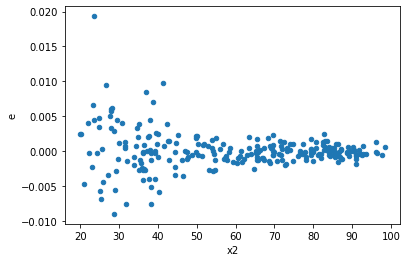

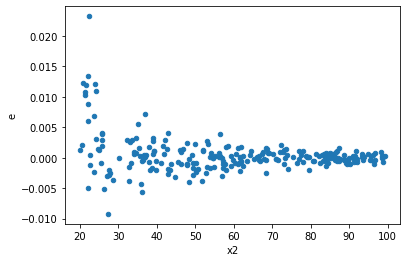

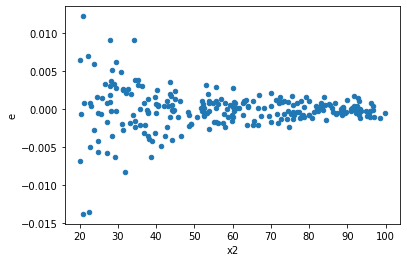

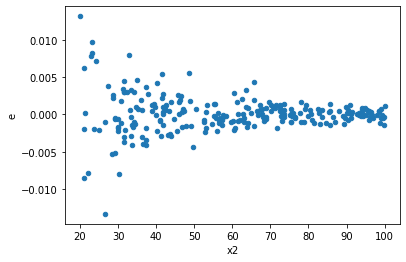

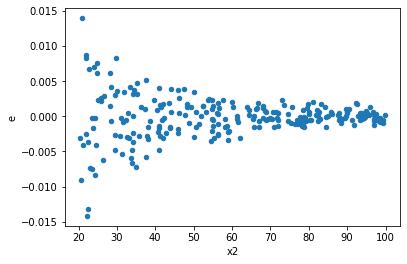

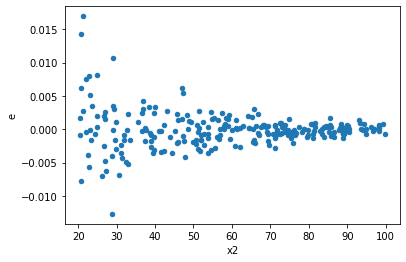

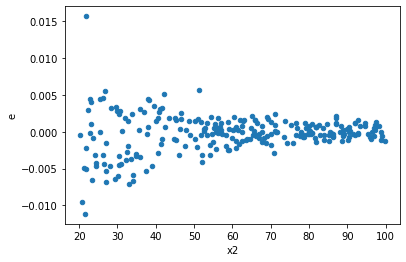

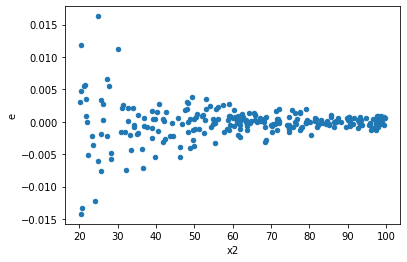

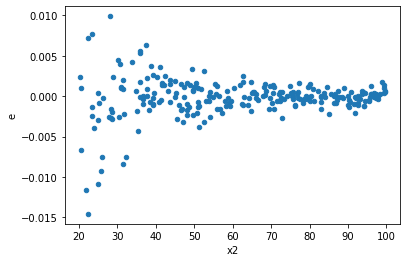

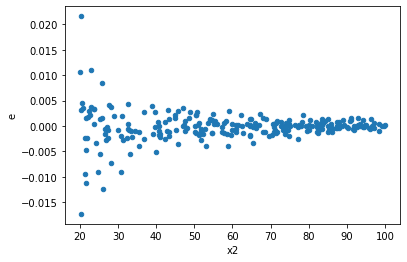

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,0.0011957562059089057,0.00020835550245131996,1.2327383566071192e-05,2.1479948706321647e-06,0.17424580480679752,4.848694952455032e-16,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,0.0015582093000469255,0.00035055832181933827,1.6064013402545625e-05,3.614003317725137e-06,0.22497511843163892,2.1379060413855075e-12,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,0.0010831030680165034,0.0002103151821520371,1.1166011010479417e-05,2.168197754144712e-06,0.19417836433349708,1.884093539881124e-14,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,0.0011284700346934403,0.0001764407601373434,1.1633711697870518e-05,1.8189769086324062e-06,0.15635396130414328,1.083863698600097e-17,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,0.001603327027644806,0.00036742823152955247,1.652914461489491e-05,3.7879199126757985e-06,0.22916611844888754,3.789093573197869e-12,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,0.0014162671460644677,0.00019927999158617253,1.460069222746874e-05,2.0544329029502324e-06,0.14070791103213334,2.369304886744777e-19,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,0.0008888231546897854,0.00026718799716934975,9.163125306080262e-06,2.7545154347355646e-06,0.3006087271236796,9.493473447203551e-09,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,0.001678212379315489,0.00017695320964445873,1.7301158549644218e-05,1.8242598932418427e-06,0.10544148751699388,3.891158663714391e-24,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,0.0009357381815292658,0.0004360167293640615,9.646785376590368e-06,4.49501782849548e-06,0.46596017771924686,0.0002098399239535457,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    988
Reject005=1 : Homoscedasticity       12
Name: Result_test, dtype: int64